<a href="https://colab.research.google.com/github/shirish-baral/ai-lab/blob/main/ailab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab Assignment 2:**
Route Finder Using Bi-Directional BFS/DFS
Objective: Use Bi-directional BFS/DFS to solve a navigation problem.
Problem Statement: Represent a city map as a graph where intersections are nodes and roads are edges. Find the shortest path between two locations.

Tasks:
  Implement Bi-directional BFS to minimize the number of nodes explored.
- Compare the performance of Bi-directional BFS with standard BFS and DFS.
- Visualize the search process (e.g., using a library like networkx in Python).


---



Comparing Algorithms:
Bi-Directional BFS: Path = ['A', 'B', 'D', 'F', 'G', 'H'], Time = 0.000022 seconds


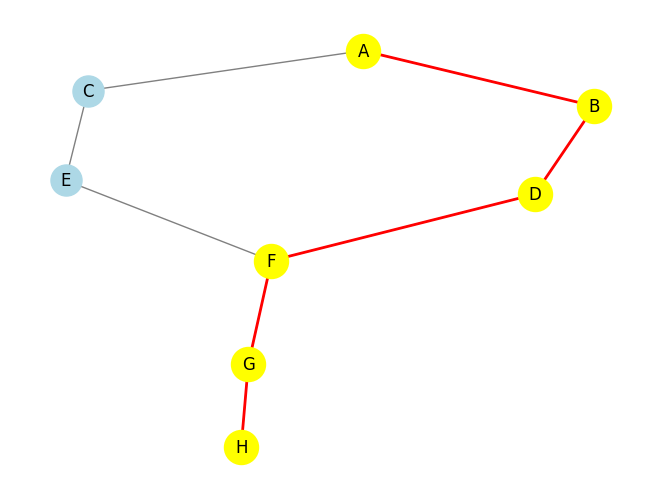

Standard BFS: Path = ['A', 'B', 'D', 'F', 'G', 'H'], Time = 0.000020 seconds


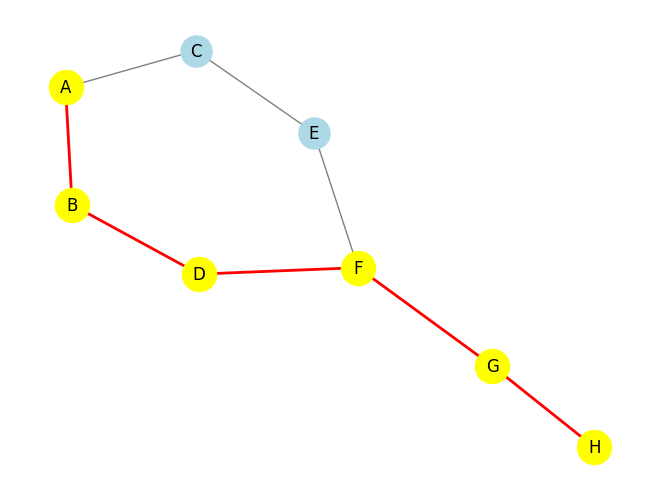

DFS: Path = ['A', 'C', 'E', 'F', 'G', 'H'], Time = 0.000023 seconds


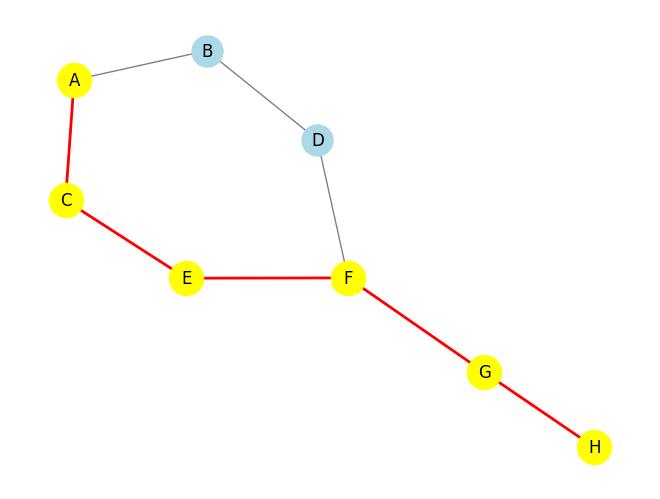

In [2]:
import networkx as nx
from collections import deque
import matplotlib.pyplot as plt
import time

# Step 1: Representing the city map as a graph
def create_city_map():
    G = nx.Graph()
    # Example edges representing roads between intersections
    edges = [
        ("A", "B"), ("A", "C"), ("B", "D"), ("C", "E"),
        ("D", "F"), ("E", "F"), ("F", "G"), ("G", "H"),
    ]
    G.add_edges_from(edges)
    return G

# Step 2: Implementing Bi-directional BFS
def bidirectional_bfs(graph, start, end):
    if start == end:
        return [start]

    # Initialize queues and visited sets
    queue_start = deque([start])
    queue_end = deque([end])
    visited_start = {start: None}  # Node: Parent
    visited_end = {end: None}      # Node: Parent

    while queue_start and queue_end:
        # Expand from the start side
        if queue_start:
            current = queue_start.popleft()
            for neighbor in graph.neighbors(current):
                if neighbor not in visited_start:
                    visited_start[neighbor] = current
                    queue_start.append(neighbor)
                    if neighbor in visited_end:  # Intersection point
                        return reconstruct_path(visited_start, visited_end, neighbor)

        # Expand from the end side
        if queue_end:
            current = queue_end.popleft()
            for neighbor in graph.neighbors(current):
                if neighbor not in visited_end:
                    visited_end[neighbor] = current
                    queue_end.append(neighbor)
                    if neighbor in visited_start:  # Intersection point
                        return reconstruct_path(visited_start, visited_end, neighbor)

    return "No path found"

# Helper function to reconstruct the path
def reconstruct_path(visited_start, visited_end, meeting_point):
    # Path from start to meeting point
    path_start = []
    current = meeting_point
    while current is not None:
        path_start.append(current)
        current = visited_start[current]

    # Path from meeting point to end
    path_end = []
    current = meeting_point
    while current is not None:
        path_end.append(current)
        current = visited_end[current]

    # Combine both paths (reverse the end path)
    return path_start[::-1] + path_end[1:]

# Step 3: Implementing Standard BFS
def bfs(graph, start, end):
    queue = deque([start])
    visited = {start: None}

    while queue:
        current = queue.popleft()
        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                visited[neighbor] = current
                queue.append(neighbor)
                if neighbor == end:
                    return reconstruct_path(visited, {end: None}, end)

    return "No path found"

# Step 4: Implementing DFS
def dfs(graph, start, end):
    stack = [start]
    visited = {start: None}

    while stack:
        current = stack.pop()
        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                visited[neighbor] = current
                stack.append(neighbor)
                if neighbor == end:
                    return reconstruct_path(visited, {end: None}, end)

    return "No path found"

# Step 5: Visualizing the Search Process
def visualize_graph(graph, path=None):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color="lightblue", node_size=500, edge_color="gray")

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color="red", width=2)
        nx.draw_networkx_nodes(graph, pos, nodelist=path, node_color="yellow", node_size=600)

    plt.show()

# Step 6: Performance Comparison
def compare_algorithms(graph, start, end):
    algorithms = {
        "Bi-Directional BFS": bidirectional_bfs,
        "Standard BFS": bfs,
        "DFS": dfs
    }

    for name, algorithm in algorithms.items():
        start_time = time.time()
        path = algorithm(graph, start, end)
        end_time = time.time()

        print(f"{name}: Path = {path}, Time = {end_time - start_time:.6f} seconds")
        visualize_graph(graph, path if path != "No path found" else None)

# Step 7: Main Function
def main():
    city_map = create_city_map()
    start = "A"
    end = "H"

    print("Comparing Algorithms:")
    compare_algorithms(city_map, start, end)

if __name__ == "__main__":
    main()